In [22]:
import sys
sys.path.append('/home/karimik/Project/git/HeaDef/postprocess')
import utility as utl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [29]:
path = '../ebsd/output'
os.listdir(path)

['id_matrix.txt',
 'pairwise_attributes.txt',
 'EulerAngles.txt',
 'attributes.txt',
 'indenter_grainID.txt',
 'misOrientationAngle.txt']

In [47]:
#--- parse euler angles
euler_angles = pd.read_csv('%s/EulerAngles.txt'%path,sep=' ')

mori = pd.read_csv('%s/misOrientationAngle.txt'%path,sep=' ')

In [48]:
filtr = mori['#grain_i_ID'] == 84
mori#[filtr]

,#grain_i_ID,grain_j_ID,phi1,Phi,phi2,angle
0,1,100,331.55790,136.56190,229.14630,45.09388
1,2,20,242.89040,51.95659,161.33660,53.10811
2,3,5,16.49563,148.88080,267.30480,36.43593
3,3,20,77.43891,166.12200,340.31480,15.59176
4,4,12,270.83200,156.22720,128.51780,44.32592
...,...,...,...,...,...,...
2576,1078,1081,296.44720,136.34800,140.98800,49.78194
2577,1079,1080,116.75570,48.10676,296.43960,59.89811
2578,1079,1081,230.87830,136.00010,89.39457,57.83879
2579,1080,1081,124.94420,133.76230,19.22582,48.69722


In [21]:
# r = np.c_[euler_angles]
# H, edges = np.histogramdd(r, bins = (5, 8, 4))
# H.shape, edges[0].size, edges[1].size, edges[2].size


((5, 8, 4), 6, 9, 5)

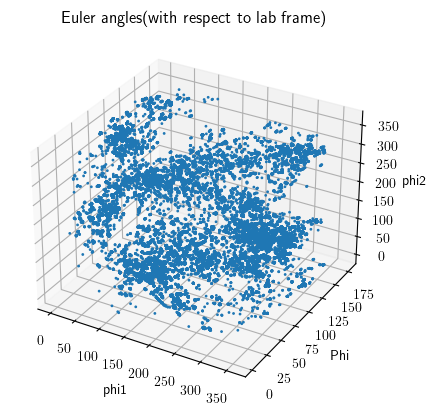

In [63]:

def randrange(n, vmin, vmax):
    """
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    """
    return (vmax - vmin)*np.random.rand(n) + vmin

def scatter(xs,ys,zs,s=1,alpha=1,set_title=''):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')


    # For each set of style and range settings, plot n random points in the box
    # defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
    for m, zlow, zhigh in [('o', -50, -25)]:
        ax.scatter(xs, ys, zs, marker=m,s=s,alpha=alpha)

    ax.set_xlabel('phi1')
    ax.set_ylabel('Phi')
    ax.set_zlabel('phi2')
    
    ax.set_title(set_title)

    plt.show()
    
xs = euler_angles['#phi1']
ys = euler_angles['Phi']
zs = euler_angles['phi2']
scatter(xs,ys,zs,set_title='Euler angles(with respect to the lab frame)')


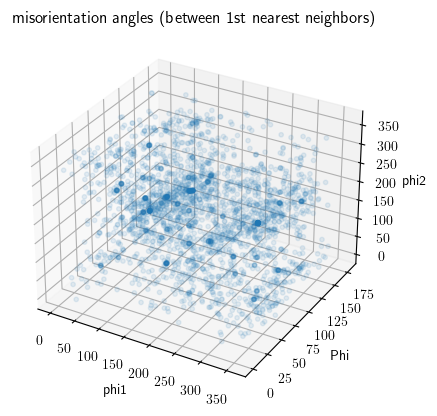

In [64]:
xs = mori['phi1']
ys = mori['Phi']
zs = mori['phi2']
scatter(xs,ys,zs,s=10,alpha=0.1,set_title='misorientation angles (between 1st-nearest neighbors)')

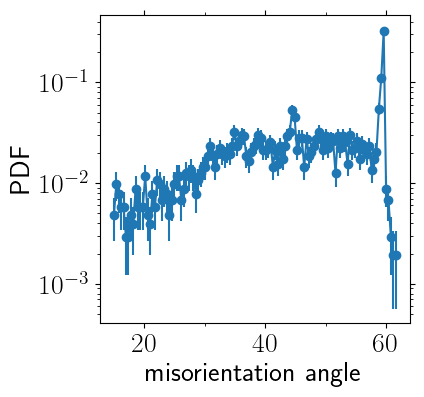

<AxesSubplot:xlabel='misorientation angle', ylabel='PDF'>

In [67]:
mori.angle
hist,edges,err=utl.GetPDF(mori.angle,n_per_decade=128,linscale=True)
utl.PltErr(edges,hist,yerr=err,
          yscale='log',
           xstr='misorientation angle',ystr='PDF',
          )